In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("Uber Request Data.csv")

In [3]:
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

In [5]:
df.shape

(6745, 6)

In [6]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [10]:
df["Request timestamp"] =df["Request timestamp"].astype(str)

In [11]:
df["Request timestamp"] =df["Request timestamp"].replace("/","-")

In [12]:
df["Request timestamp"]= pd.to_datetime(df["Request timestamp"], dayfirst =True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [14]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst =True)

In [15]:
req_hour =df["Request timestamp"].dt.hour

In [16]:
len(req_hour)

6745

In [17]:
df["req_hour"]= req_hour

In [18]:
req_day=df["Request timestamp"].dt.day

In [19]:
df["req_day"]=req_day

In [20]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

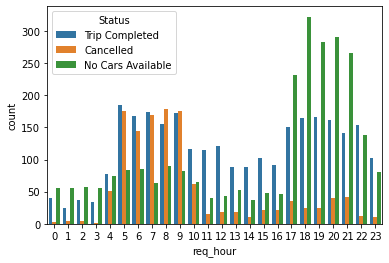

In [22]:
sns.countplot(x="req_hour",data =df,hue="Status")
plt.show

/Users/dchandwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


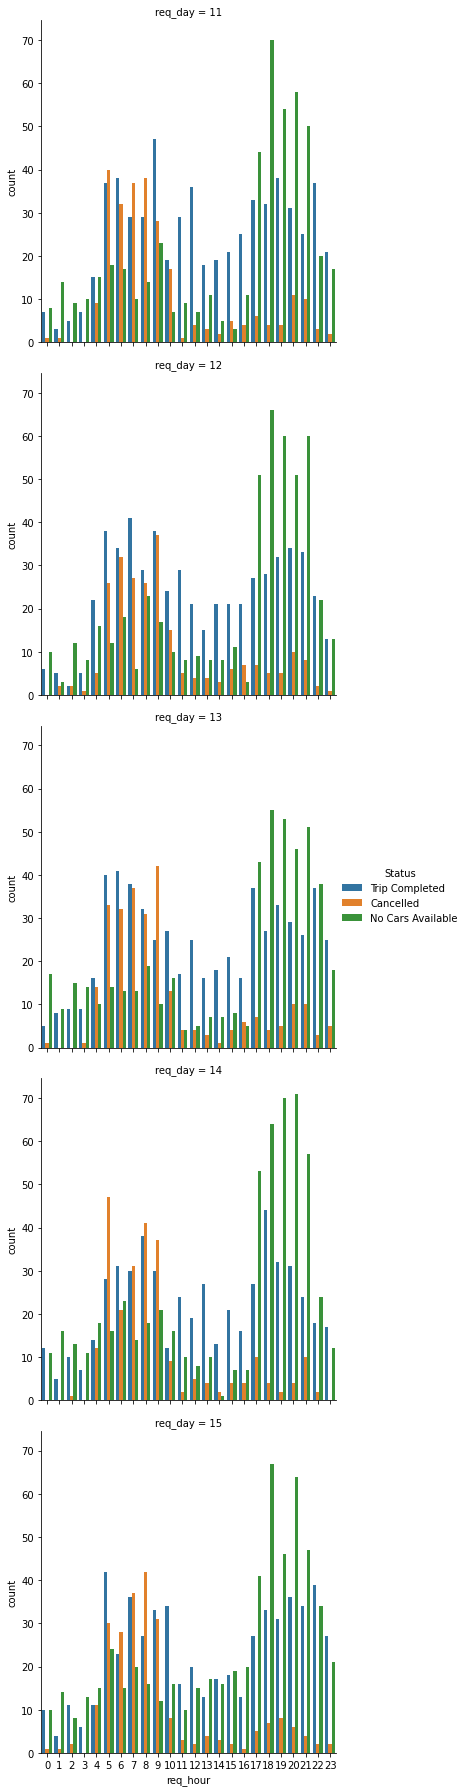

In [23]:
sns.factorplot(x="req_hour",data=df,hue="Status",row="req_day",kind="count")
plt.show()

/Users/dchandwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


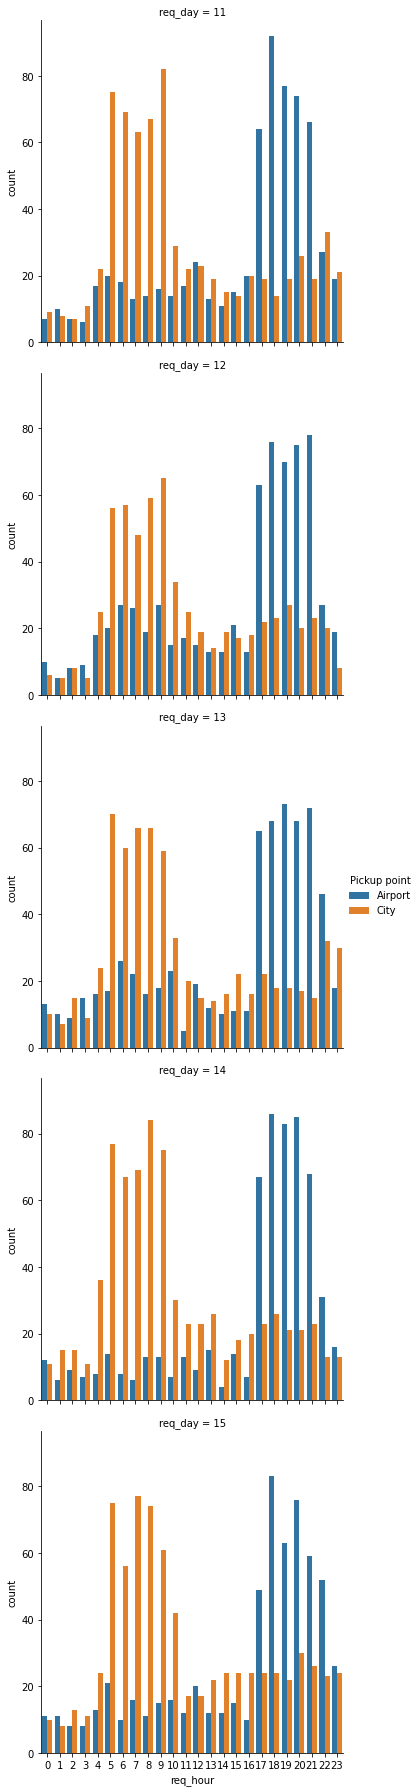

In [24]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",row="req_day",kind="count")
plt.show()

/Users/dchandwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


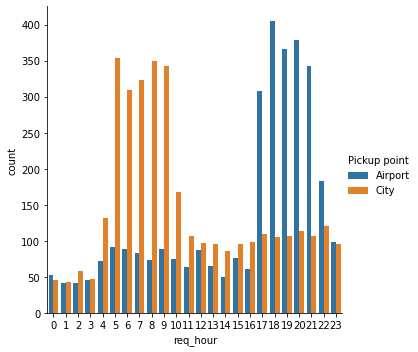

In [25]:
sns.factorplot (x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [26]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [27]:
df["time_slot"]=0

In [28]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [29]:
j=0
for i in df["time_slot"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="premorning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="morning rush"
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_time"
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="evening Rush"
    else:
        df.iloc[j,8]="late Night"
    j=j+1
        
    

In [30]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,morning rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,morning rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,late Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,late Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,late Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,late Night


In [31]:
df["time_slot"].value_counts()

evening Rush    2342
morning rush    2103
Day_time        1224
premorning       578
late Night       498
Name: time_slot, dtype: int64

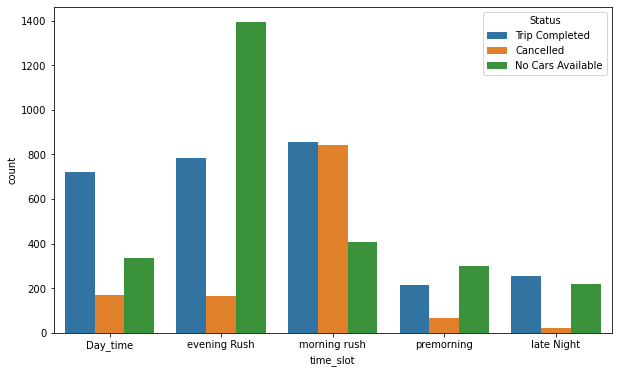

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x="time_slot",hue="Status",data=df)
plt.show()

In [33]:
df_morning_rush = df[df["time_slot"]=="morning rush"]

In [34]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,morning rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,morning rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,late Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,late Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,late Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,late Night


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

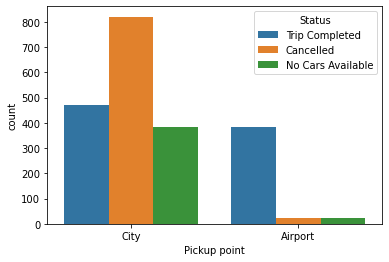

In [35]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

In [36]:
df_airport_cancelled =df_morning_rush.loc[(df["Pickup point"]=="Airport") & (df["Status"]=="Cancelled")]

In [37]:
df_airport_cancelled.shape[0]

23

In [38]:
df_city_cancelled =df_morning_rush.loc[(df["Pickup point"]=="City")&(df["Status"]=="Cancelled")]

In [39]:
df_city_cancelled.shape[0]

820

# supply and demand

In [40]:
df_morning_rush.loc[(df["Pickup point"]=="City")].shape[0]

1677

In [41]:
df_morning_rush.loc[(df["Pickup point"]=="City")&(df["Status"]=="Trip Completed")].shape[0]

472

In [42]:
df_morning_rush.loc[(df["Pickup point"]=="Airport")].shape[0]

426

In [43]:
df_morning_rush.loc[(df["Pickup point"]=="Airport")&(df["Status"]=="Trip Completed")].shape[0]

382

In [49]:
df_evening_rush = df[df["time_slot"]=="evening Rush"]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

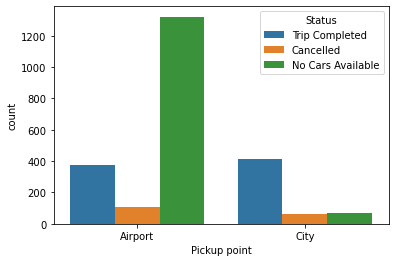

In [50]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [51]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [52]:
df_evening_rush.loc[(df["Pickup point"]=="City")&(df["Status"]=="Cancelled")].shape[0]

60

In [53]:
df_evening_rush.loc[(df["Pickup point"]=="City")].shape[0]

542

In [54]:
df_evening_rush.loc[(df["Pickup point"]=="City")&(df["Status"]=="Trip Completed")].shape[0]

411

In [55]:
df_evening_rush.loc[(df["Pickup point"]=="Airport")].shape[0]

1800

In [56]:
df_evening_rush.loc[(df["Pickup point"]=="Airport")&(df["Status"]=="Trip Completed")].shape[0]

373

## cancelled

In [58]:
df_evening_rush.loc[(df["Pickup point"]=="City")&(df["Status"]=="Cancelled")].shape[0]

60

In [57]:
df_evening_rush.loc[(df["Pickup point"]=="Airport")&(df["Status"]=="Cancelled")].shape[0]

106

In [59]:
df_evening_rush.loc[(df["Pickup point"]=="City")&(df["Status"]=="No Cars Available")].shape[0]

71

In [61]:
df_evening_rush.loc[(df["Pickup point"]=="Airport")&(df["Status"]=="No Cars Available")].shape[0]

1321

# pie chart

In [62]:
df_evening_city = df.loc[(df["Pickup point"]=="City")&(df["time_slot"]=="evening Rush")]

In [64]:
df_evening_city_count =pd.DataFrame(df_evening_city["Status"].value_counts())

In [65]:
df_evening_city_count

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


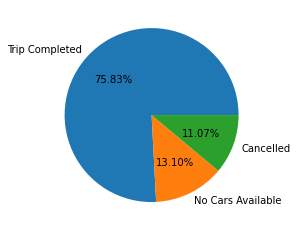

In [67]:
fig,ax=plt.subplots()
ax.pie(df_evening_city_count["Status"].values,labels=df_evening_city_count["Status"].index,autopct="%.2f%%")
plt.show()

In [70]:
df_evening_airport=df.loc[(df["Pickup point"]=="Airport")&(df["time_slot"]=="evening Rush")]

In [73]:
df_evening_airport_count =pd.DataFrame(df_evening_airport["Status"].value_counts())

In [74]:
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


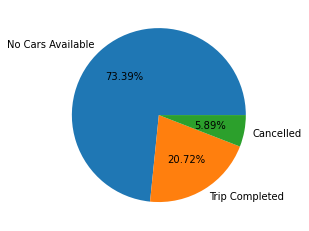

In [76]:
fig,ax =plt.subplots()
ax.pie(df_evening_airport_count["Status"].values,labels=df_evening_airport_count["Status"].index,autopct="%.2f%%")
plt.show()